# Projeto 2

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import iqr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1 - Gere dados a partir de uma distribuição de Poisson. Varie a taxas $\lambda$ no intervalo [1,10] e mostre o gráfico da média em função da variância.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Unrecognized location 'uuper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


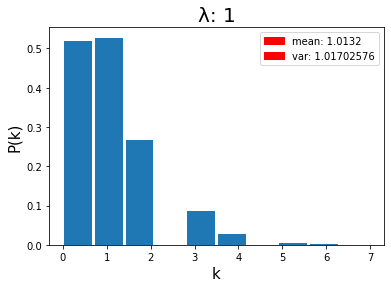

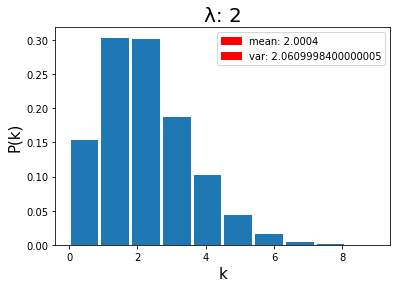

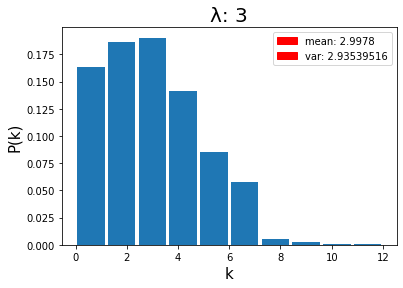

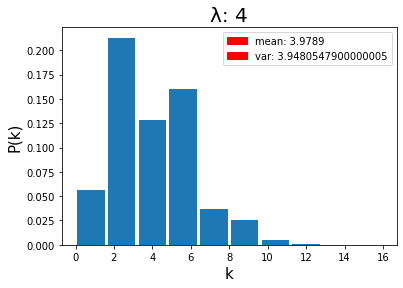

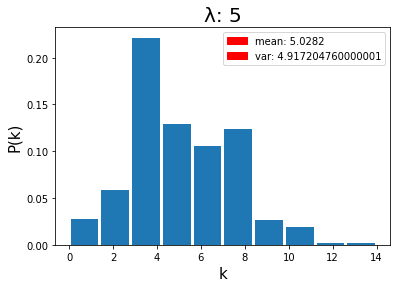

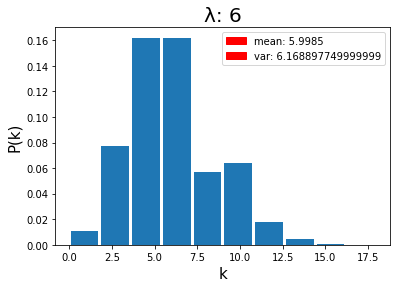

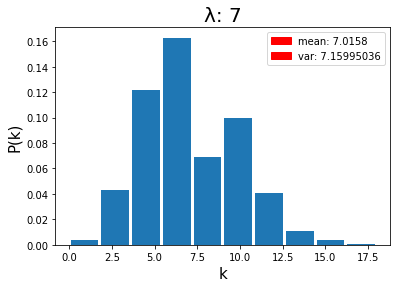

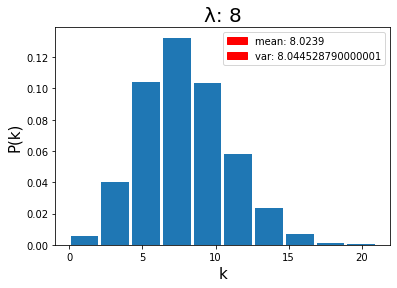

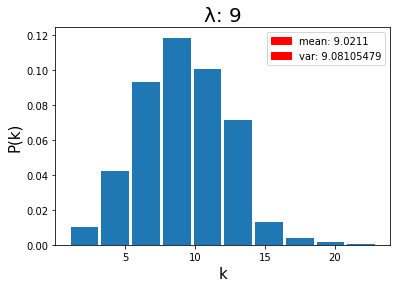

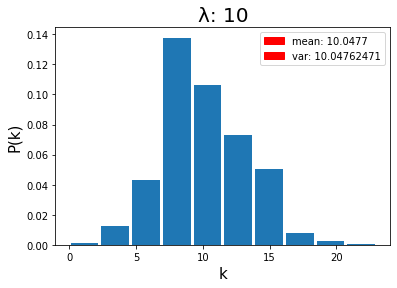

In [ ]:
lbd = np.arange(1,11) #taxas
n = 10000 #numero de pontos
means = np.empty(10)
vars = np.empty(10)

for i in range(len(lbd)):
    pts = np.random.poisson(lbd[i],n)#gera pontos numa distribuicao de Poisson

    #plot histogram
    plt.hist(pts,density=True,rwidth=0.9)
    plt.title('λ: '+str(lbd[i]),fontsize=20)
    plt.xlabel('k',fontsize=15)
    plt.ylabel('P(k)',fontsize=15)
    
    means[i] = np.mean(pts)
    vars[i] = np.var(pts)
    
    
    mean = mpatches.Patch(color='red',label='mean: '+str(means[i]))
    var = mpatches.Patch(color='red',label='var: '+str(vars[i]))

    plt.legend(loc='uuper right',handles=[mean,var])
    
    plt.show()


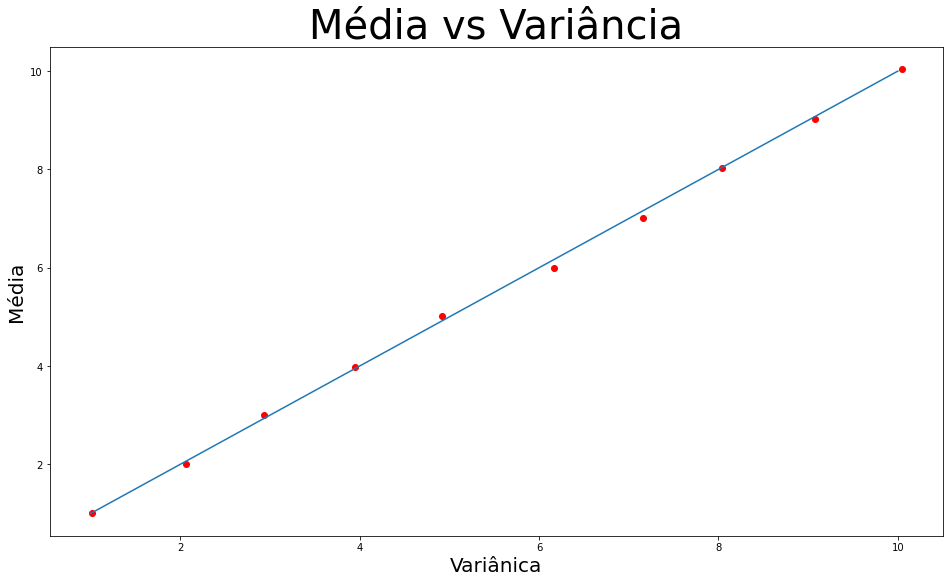

In [ ]:
#plot media vs variancia

#pontos
plt.figure(figsize=(16,9))
plt.scatter(vars,means,color='red')

#curva teorica y=x
plt.plot(np.arange(1,11),np.arange(1,11))

#grafico
plt.title('Média vs Variância',fontsize=40)
plt.xlabel('Variânica',fontsize=20)
plt.ylabel('Média',fontsize=20)
plt.show()

###2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [ ]:
# IMPORTANDO OS DADOS DA IRIS

data = pd.read_csv('/content/drive/Shared drives/Ciencia de Dados/data/iris.csv', header=0)

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
colunas = data[data.columns[:-1]] # selecionando as colunas numéricas

data_array = np.array(colunas).T # transformando em um array

medias=[]
variancias=[]
IQRs=[]

for i in range(colunas.shape[1]): # para cada coluna do array

  media = np.mean(data_array[i]) # calcula-se a média
  variancia = np.var(data_array[i]) # a variancia
  IQR = iqr(data_array[i]) # a distancia interquantil

  medias.append(media)
  variancias.append(variancia)
  IQRs.append(IQR)

print('Médias:',medias)
print('Variâncias:',variancias)
print('Distância Interquantil:',IQRs)

Médias: [5.843333333333334, 3.0540000000000003, 3.758666666666666, 1.1986666666666668]
Variâncias: [0.6811222222222223, 0.18675066666666668, 3.092424888888889, 0.5785315555555555]
Distância Interquantil: [1.3000000000000007, 0.5, 3.4999999999999996, 1.5]


###3 - Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

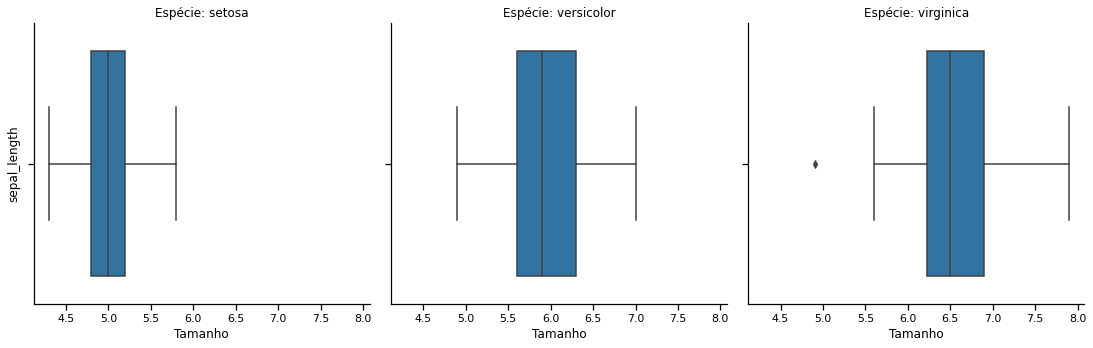

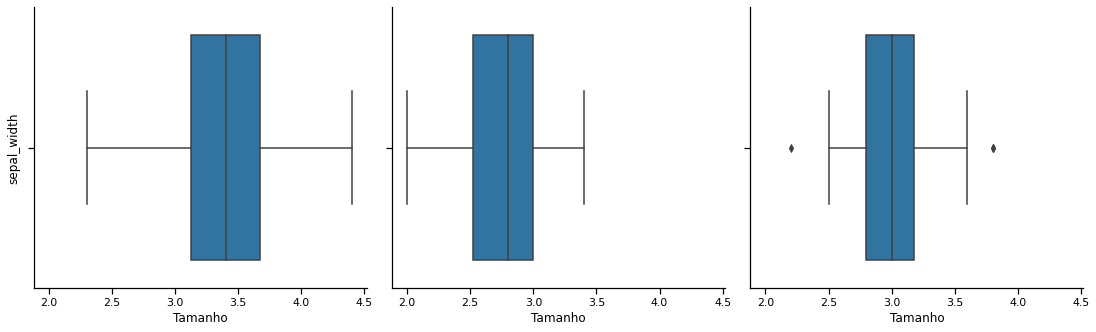

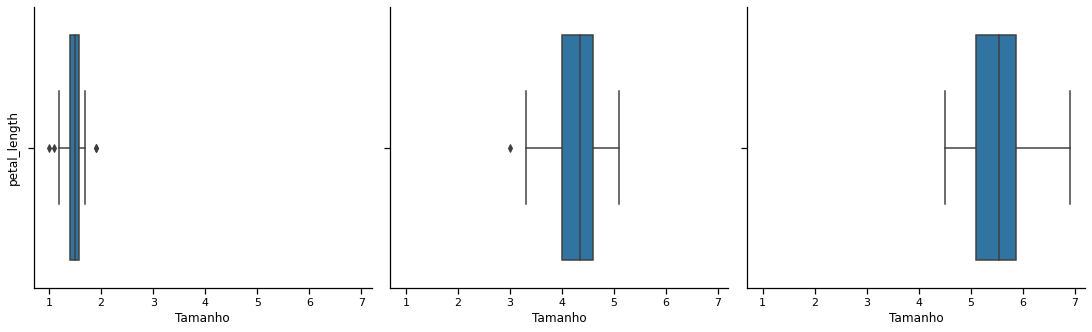

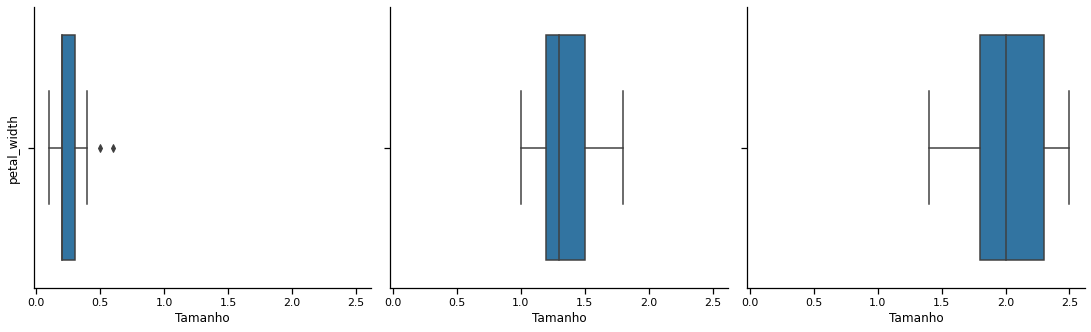

In [ ]:
for i in range(len(data.columns[:-1])):

  with sns.plotting_context('notebook',font_scale=1): # altera escala da fonte

    grafico = sns.FacetGrid(data, col='species', col_wrap=4, despine=True, height=5)

    grafico.map_dataframe(sns.boxplot, data.columns[i], order=[1,2,3,4]) # para cada característica cria-se uma linha com boxplot separados por espécie
    grafico.set_ylabels(data.columns[i]) # nomeia cada linha com a caracteristica
    grafico.set_xlabels('Tamanho') # retira os labels das colunas
    if i == 0: # se for a primeira linha
      grafico.set_titles(col_template='Espécie: {col_name}') # nomeia as colunas de acordo com as espécies
    else:
      grafico.set_titles(col_template='') # senao deixa sem nome

plt.show()

###4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

###6- Considere os dados abaixo, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis x e y. O que você pode dizer sobre esses dados?